# 1 Project Objective

Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report. Going through each request manually can be very time consuming, also prone to human errors. However, if we can use the historical data to build a model which can shortlist the candidates for approval that can be great. Art of machine learning is that it can be used to solve this types of various problems given the historical data. In this project, we will attempt to predict how likely a credit card request will approve.

#  2 Project Scpoe

By analyzing the data through exploratory data analysis,we will build a predictor model by using some well-known pre-processing methods such as imputing missing values, label encoding, scaling the columns values and finally applying the model on training data set and evaluating the model with testing data set. We will also see a few additional approaches on how to improve the model performance.

# 3 Hardware and Software Requirements

Here we use HP-Pavilion-14-Notebook-PC to do this work. The full project is implimented in Python program in jupyter notebook IDE.

#  4 Data Overview

In [1]:
import pandas as pd
df=pd.read_csv("/home/rounak/machinelearningproject/CC_data.csv")#impot data set
df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [2]:
print("Shape of the data: ",df.shape)

Shape of the data:  (690, 16)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Male              690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In the given data set we have a total of 690 observations. These are 690 applications from past for credit card request. For each candidate (observation) we have 16 variables in total. 15 variables cover various information about candidates such as their age, gender, income, marital status, number of year in employment, etc. and 1 variable is the final result whether the request was approved or rejected.# 

#  5 Data Cleaning 

# Common Issues With Data
+ Missing Data
+ Different Data Types 
+ etc

# Missing Data

To make detecting missing values easier (and across different array dtypes), Pandas provides the isnull() and notnull() functions, which are also methods on Series and DataFrame objects. Here we use isnull() function and observe total sum of missing values in each columns.

In [4]:
#check null values
df.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

I have not missing values in my data set. So i don't need any missing value treatment. 

# Different Data Types

When doing data analysis, it is important to make sure you are using the correct data types; otherwise you may get unexpected results or errors. In the case of pandas, it will correctly infer data types in many cases.

In [5]:
#check data types of each columns
df.dtypes

Male               object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
Approved           object
dtype: object

# After looking at the automatically assigned data types, there are several concerns:
The Age and ZipCode columns are stored as object, not numerical values such as a float64 or int64.
Until we clean up these data types, it is going to be very difficult to do much additional analysis on this data.

In [6]:
#Solve this data types prob by pandas pd.to_numeric function
df['Age']=pd.to_numeric(df['Age'], errors='coerce').fillna(0)
df['ZipCode']=pd.to_numeric(df['ZipCode'], errors='coerce').fillna(0)

In [7]:
df.dtypes

Male               object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode           float64
Income              int64
Approved           object
dtype: object

# 6  Data Preparation

In [8]:
#Check missing values
df.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [9]:
#The describe function returns a pandas data frame type that provides descriptive statistics 
df.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.019159,4.758725,2.223406,2.40000,180.547826,1017.385507
std,12.552078,4.978163,3.346513,4.86294,173.970323,5210.102598
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.440000,1.000000,0.165000,0.00000,60.000000,0.000000
50%,28.170000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


 For each numeric fields, different parameters such as mean, standard deviation, and percentile level have been indicated in the figure. Such as the average income for all the users is 1017.4, the average year of employment 2.2 years, etc. shown in the following table.

# 7  Data Discription and Distribution

In this section we will see that how the data are distributed by using some data visualization like histro gram scatter plot bar diagram etc.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

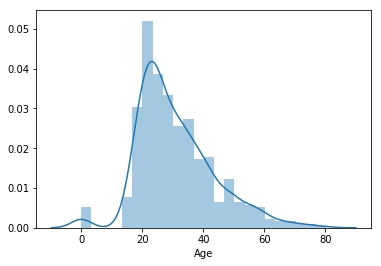

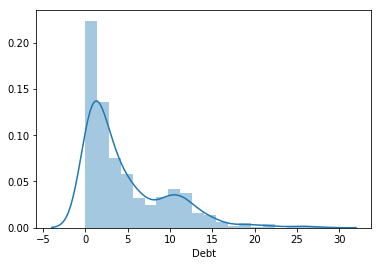

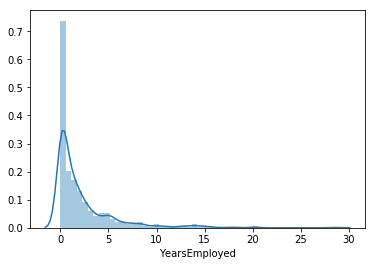

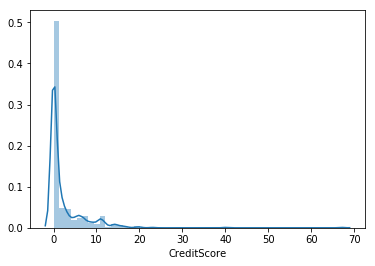

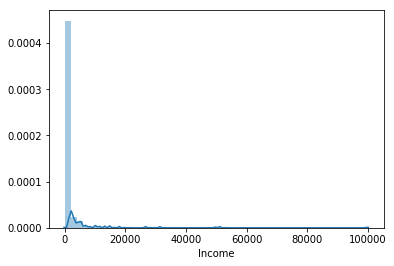

In [11]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(df['Age'])
plotDistPlot(df['Debt'])
plotDistPlot(df['YearsEmployed'])
plotDistPlot(df['CreditScore'])
plotDistPlot(df['Income'])

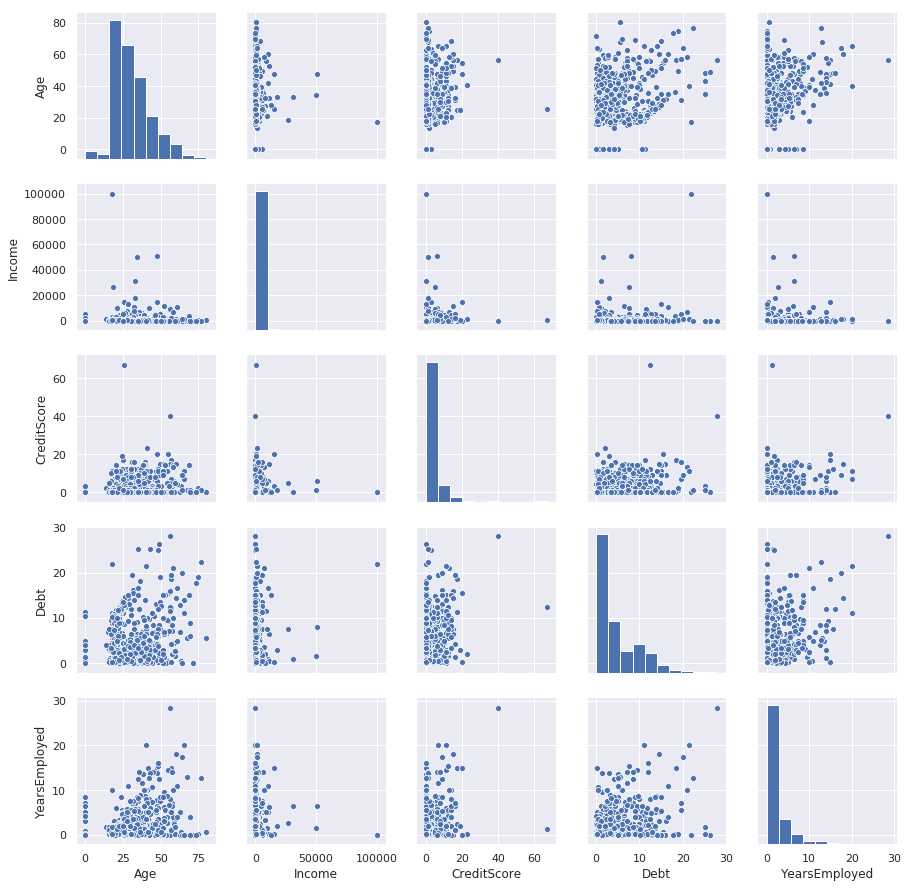

In [12]:
#scatterplot
sns.set()
cols = ['Age', 'Income', 'CreditScore', 'Debt', 'YearsEmployed']
sns.pairplot(df[cols], size = 2.5)
plt.show()

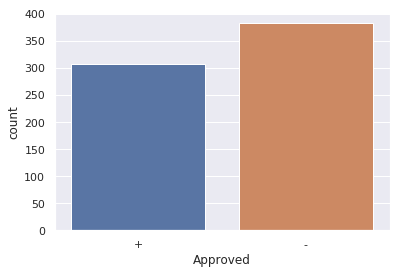

In [13]:
#Check my dependent variable is catagoric or numeric type
sns.countplot(data = df, x = 'Approved')

By using countplot i see that the dependent variable is catagoric type.

In [14]:
df=df.drop('ZipCode',axis='columns')

Here we drop the ZipCode attribute beacasue we don't need this attribute for credit card application approval.  

# 8 Exploratory Data Analysis
+ 8.1 Univariate Analysis
+ 8.2 Variable Creation
+ Bivariate Analysis
+ 8.4 Outlier Detection and Treatment
+ 8.5 Feature Scaling

#  8.1 Univariate Analysis 
 After see data distribution we check here which data columns are skewed. If any data columns are skewed then we solve it by differnt mathmatical techniques. 

In [15]:
#check skewness by skew function
df.skew()

Age               0.827252
Debt              1.488813
YearsEmployed     2.891330
CreditScore       5.152520
Income           13.140655
dtype: float64

 By using skew() we see that Debt, YearsEmployed, CreditScore and Income columns are right skewed . So, I use here sqrt (Squre Root) funtion to remove skewness of the data.

Skewness is 0.5088000578620185


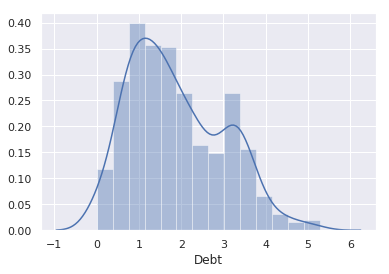

In [16]:
#now transforming the Debt variable
import numpy as np
df['Debt'] = np.sqrt(df['Debt'])
print ('Skewness is', df['Debt'].skew())
sns.distplot(df['Debt'])

Skewness is 0.24626486442525736


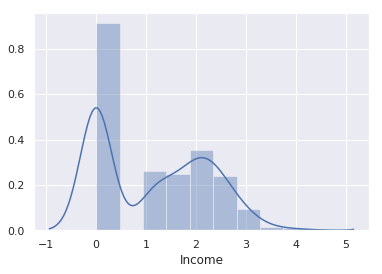

In [19]:
#now transforming the income variable
df['Income'] = np.sqrt(df['Income'])
print ('Skewness is', df['Income'].skew())
sns.distplot(df['Income'])

Skewness is -0.20757919738436978


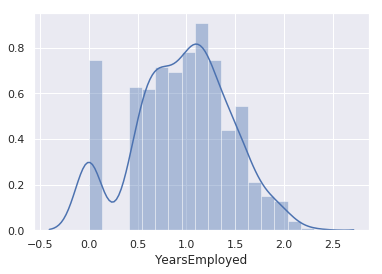

In [21]:
#now transforming the YearsEmployed variable
df['YearsEmployed'] = np.sqrt(df['YearsEmployed'])
print ('Skewness is', df['YearsEmployed'].skew())
sns.distplot(df['YearsEmployed'])

Skewness is 0.5799175946575778


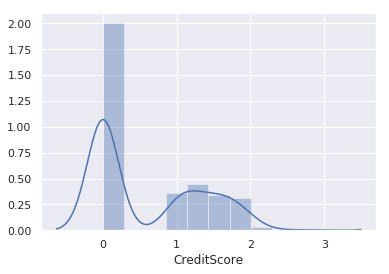

In [23]:
#now transforming the CreditScore variable
df['CreditScore'] = np.sqrt(df['CreditScore'])
print ('Skewness is', df['CreditScore'].skew())
sns.distplot(df['CreditScore'])

In [24]:
df.skew()

Age              0.827252
Debt             0.508800
YearsEmployed   -0.207579
CreditScore      0.579918
Income           0.246265
dtype: float64

After removing skewness of the data we see that the data columns are not skewed.

# 8.2 Variable Creation

Here we convert the catagorical data to numerical by using pandas dummies variable and sklearn labelencoding methods.

#  Dummies Variable

In [25]:
# create dummies variable
dummies=pd.get_dummies(df['Approved'])
dummies.head()

,+,-
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


# Dummies Variable Trap

When you can derive one variable from other variables, they are known multi-colinear. Here we convart the approved column to dummies variable in new data frame, we see that there two columns are created one for '+' and anather for '-'. If you know the value of '+' column then you can easily infer value of '-' column. That is '+'=0. In this case we don't work with this. Hence you need to drop the column. If there are m number of catagories, use m-1 in the model.   

In [26]:
dummies.drop('-',axis='columns',inplace=True)#Avoid Dummy Variable Trap
dummies.rename(columns = {'+':'Approved'}, inplace = True) 
dummies.head()

,Approved
0,1
1,1
2,1
3,1
4,1


# Label Encoding


Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [27]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in df:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])

In [28]:
#Concat the two columns
df.drop('Approved',axis='columns',inplace=True)
df=pd.concat([df,dummies],axis='columns')
df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,2,30.83,0.000000,2,1,13,8,1.057371,1,1,1.000000,0,0,0.000000,1
1,1,58.67,2.111871,2,1,11,4,1.320439,1,1,1.565085,0,0,2.205583,1
2,1,24.50,0.707107,2,1,11,4,1.106682,1,0,0.000000,0,0,2.314680,1
3,2,27.83,1.240967,2,1,13,8,1.391579,1,1,1.495349,1,0,1.147203,1
4,2,20.17,2.371708,2,1,13,8,1.143534,1,0,0.000000,0,2,0.000000,1


 Now my all catagorical columns are convert to numerical data types.

# 8.3 Bivariate Analysis

Here we finding the analysis between input vactors and output vactor by using Correlation matrix .How the features are related to each other or the target variable.Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable).Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library. 

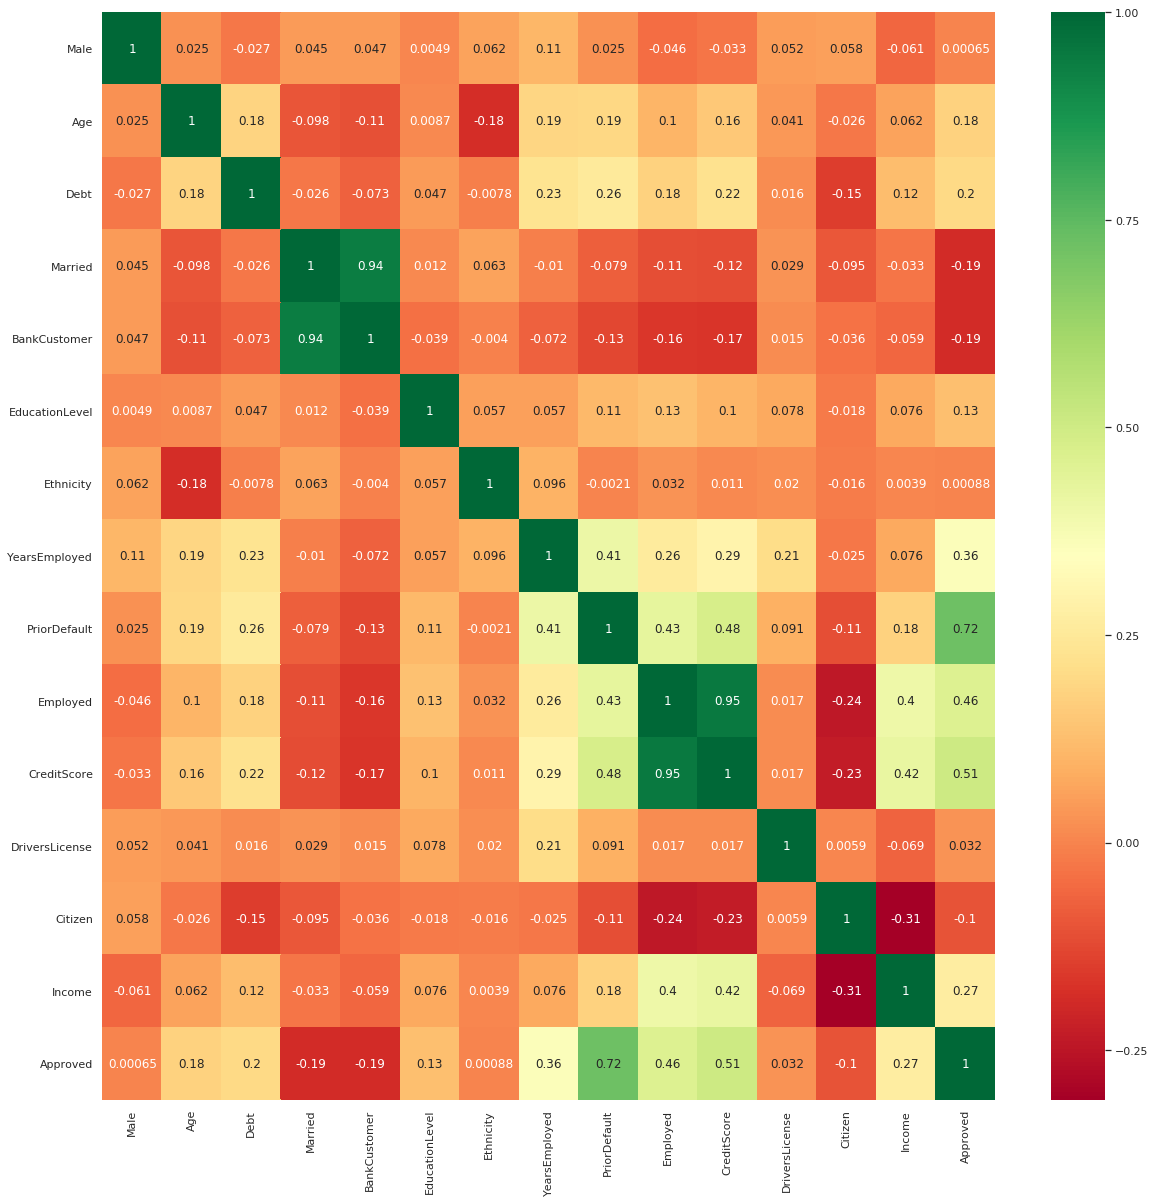

In [29]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# 8.4 Outlier Detection and Treatment 


An outlier is any data point which differs greatly from the rest of the observations in a dataset.Outliers can impact the results of our analysis and statistical modeling in a drastic way. Here we detect the outlier by using boxplot and treatment it 

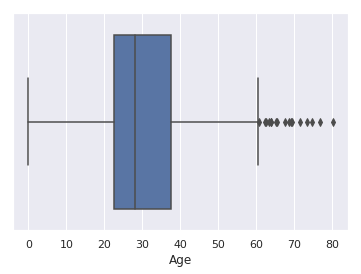

In [30]:
sns.boxplot(df['Age'])

In [31]:
df['Age'].describe()

count    690.000000
mean      31.019159
std       12.552078
min        0.000000
25%       22.440000
50%       28.170000
75%       37.707500
max       80.250000
Name: Age, dtype: float64

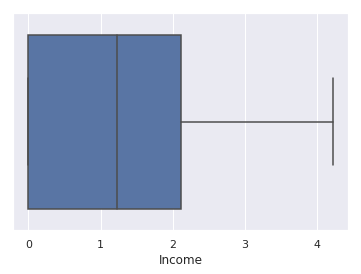

In [32]:
sns.boxplot(df['Income'])

In [33]:
df['Income'].describe()

count    690.000000
mean       1.141295
std        1.092807
min        0.000000
25%        0.000000
50%        1.222845
75%        2.111753
max        4.216965
Name: Income, dtype: float64

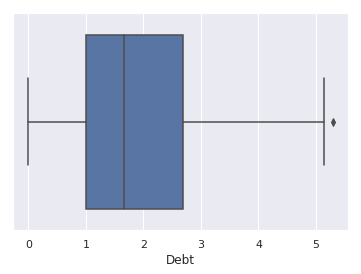

In [34]:
sns.boxplot(df['Debt'])

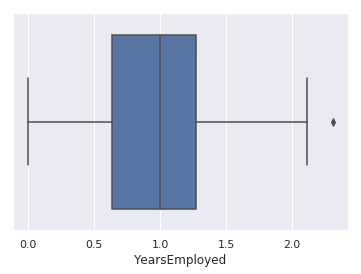

In [35]:
sns.boxplot(df['YearsEmployed'])

In [36]:
df['YearsEmployed'].describe()

count    690.000000
mean       0.958424
std        0.489103
min        0.000000
25%        0.637340
50%        1.000000
75%        1.272865
max        2.310528
Name: YearsEmployed, dtype: float64

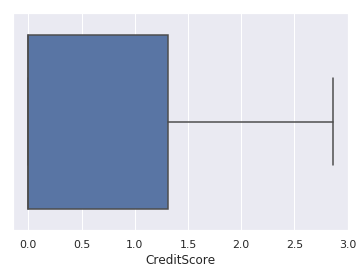

In [37]:
sns.boxplot(df['CreditScore'])

In [38]:
df['CreditScore'].describe()

count    690.000000
mean       0.606612
std        0.737104
min        0.000000
25%        0.000000
50%        0.000000
75%        1.316074
max        2.861006
Name: CreditScore, dtype: float64

After show in boxplot we see that  Age,Debt and YearsEmployeed columns has outlier. So, now we solve it. 

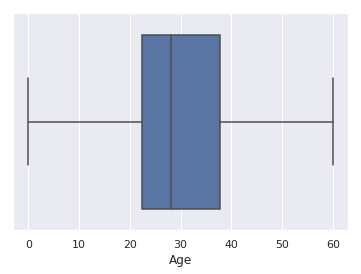

In [39]:
import numpy as np
df['Age']=np.where(df['Age']>=60,60,df['Age'])
sns.boxplot(df['Age'])

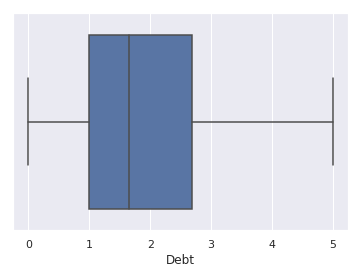

In [40]:
df['Debt']=np.where(df['Debt']>=5,5,df['Debt'])
sns.boxplot(df['Debt'])

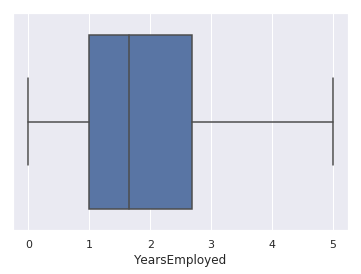

In [41]:
df['YearsEmployed']=np.where(df['YearsEmployed']>=3,3,df['Debt'])
sns.boxplot(df['YearsEmployed'])

# 8.5 Feature Scaling

Before making any actual predictions it is always a good practice to scale the features so that all of them can be uniformly evaluated. Here we use sklearn.preprossing StanDardScaler method to scaled the features. 

In [42]:
#Define independent and dependent variable 
x=df.drop("Approved",axis='columns')#independent columns
y=df["Approved"]#dependent columns

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
#initialise the scaler
scaler=StandardScaler()

In [45]:
#Scale the data
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

# 9 Data Modeling and Evaluation

+ 9.1 Random Forest For Feature Selection and Importance
+ 9.2 Logistic Regression
+ 9.3 Decision Tree
+ 9.4 K-Nearest Neighbors
+ 9.5 Naive-Bayes

# 9.1 Random Forest

Random Forests are often used for feature selection in a data science workflow. The reason is because the tree-based strategies used by random forests naturally ranks by how well they improve the purity of the node. . This mean decrease in impurity over all trees called gini impurity. 

In [164]:
#Split for train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=123)

In [47]:
#Traing the algorithm
from sklearn.ensemble import RandomForestClassifier
regressor=RandomForestClassifier(n_estimators=20)
regressor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
#Evalution Algorithm
y_pred=regressor.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[72  4]
 [16 46]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        76
           1       0.92      0.74      0.82        62

   micro avg       0.86      0.86      0.86       138
   macro avg       0.87      0.84      0.85       138
weighted avg       0.86      0.86      0.85       138

0.855072463768116


# Feature Selection


Feature ranking:
1. feature 8 (0.311196)
2. feature 10 (0.117220)
3. feature 13 (0.098339)
4. feature 7 (0.090933)
5. feature 2 (0.078214)
6. feature 9 (0.076741)
7. feature 5 (0.068975)
8. feature 1 (0.061662)
9. feature 6 (0.036648)
10. feature 0 (0.016670)
11. feature 11 (0.014959)
12. feature 3 (0.013453)
13. feature 12 (0.007863)
14. feature 4 (0.007128)


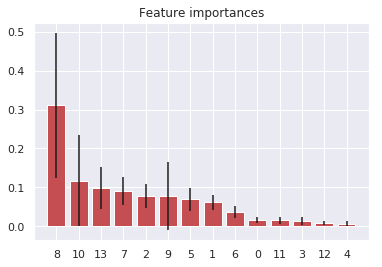

In [49]:
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d."" feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

#  Which attribute has played most important role in credit card request decision?

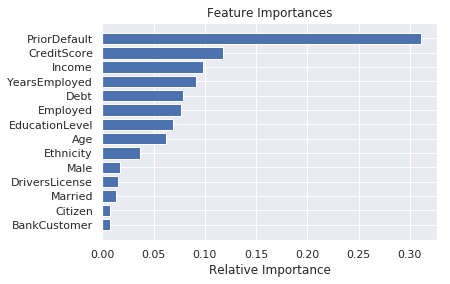

In [50]:
features = x.columns
importances = regressor.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to random forest the graph indicates the feature importance for the given data set in making the decision of credit card request should get approved or not. Prior default is coming as one of the most important features, followed by credit score, years of employment, debt, income, and age. Bottom 5 are not at all playing any significant role.

In [51]:
#Define independent variable after feature selection 
x=x.drop(['Male','Married','BankCustomer','DriversLicense','Citizen'],axis='columns')

In [52]:
x.columns

Index(['Age', 'Debt', 'EducationLevel', 'Ethnicity', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income'],
      dtype='object')

# 9.2 Logistic Regression

Logistc Regression is machine learning algorithm which is used for the classification problem . After see the fetures importance now impliment the logistic regression model for our data set by selecting the relivent fetures. 

In [53]:
#Split for train and test the data
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.20,random_state=123)

In [54]:
#Create logistic regression model
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()
lg.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
#Prediction
y_pred1=lg.predict(X_test1)
y_pred1

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0], dtype=uint8)

In [97]:
#Check Accuracy
print("Acuracy Score for Logistic Regression model:",lg.score(X_test1,y_test1)*100)

Acuracy Score for Logistic Regression model: 86.23188405797102


#  9.3 Decision Tree

Decision tree is the graphical representation of all the possible solutions to a decision. Now, impliment the decision tree model for our data set.

In [56]:
#Split for train and test the data
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.20,random_state=123)

In [57]:
#Implement Decision Tree model
from sklearn import tree
dtree=tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train2,y_train2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
#Prediction 
y_pred2=dtree.predict(X_test2)
y_pred2

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0], dtype=uint8)

In [80]:
print("Acuracy Score for Decision Tree model",dtree.score(X_test2,y_test2)*100)

Acuracy Score for Decision Tree model 80.43478260869566


# 9.4 K-Nearest Neighbors

K-Nearest Neighbors, or KNN for short, is one of the simplest machine learning algorithms and is used for both problem classification and regression. Now, impliment the knn model for our data set.

In [60]:
#Split for train and test the data
from sklearn.model_selection import train_test_split
X_train3,X_test3,y_train3,y_test3=train_test_split(x,y,test_size=0.20,random_state=123)

In [61]:
#impliment knn model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train3, y_train3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [62]:
y_pred3 = knn.predict(X_test3)
y_pred3

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0], dtype=uint8)

In [63]:
print("Acuracy Score for KNeighbors model: ",knn.score(X_test3,y_test3)*100)

Acuracy Score for KNeighbors model:  71.01449275362319


# 9.5 Naive-Bayes

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.Now, impliment the Naive-Bayes model for our data set.

In [64]:
#Split for train and test the data
from sklearn.model_selection import train_test_split
X_train4,X_test4,y_train4,y_test4=train_test_split(x,y,test_size=0.20,random_state=123)

In [67]:
#Impliment Naive-Bayes Model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
gnb.fit(X_train4, y_train4)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
y_pred4 = gnb.predict(X_test4)
y_pred4

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0], dtype=uint8)

In [70]:
print("Acuracy Score for Naive-Bayes model: ",gnb.score(X_test4,y_test4)*100)

Acuracy Score for Naive-Bayes model:  84.78260869565217


# 10 Confusion Matrix

A confusion matrix is a summary of prediction result on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. Here, we implement confusion matrix for each model which are used in previous section.

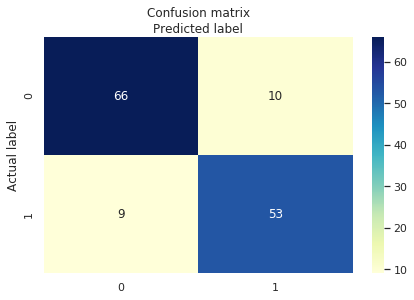

In [71]:
#Confusion matrix for Logistic Regression Model
import numpy as np
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test1,y_pred1)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

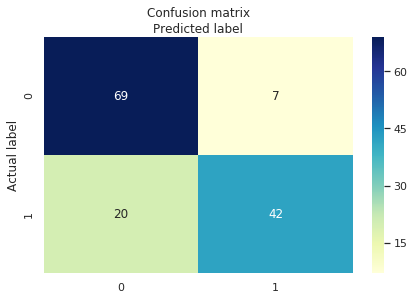

In [73]:
#Confusion matrix for Decision Tree
import numpy as np
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test2,y_pred2)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

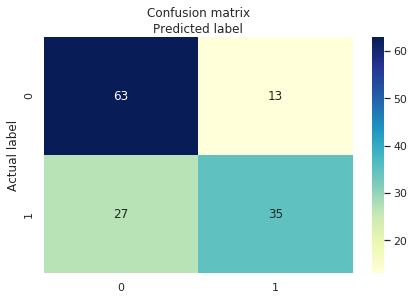

In [74]:
#Confusion matrix for KNN
import numpy as np
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test3,y_pred3)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

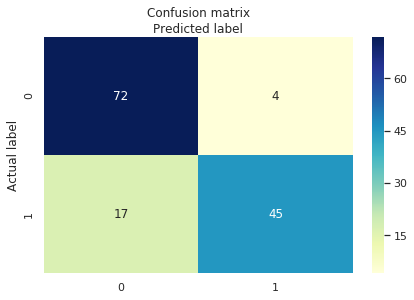

In [77]:
# Confusion matrix for Naive-Bayes
import numpy as np
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test4,y_pred4)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# 11 Performance Comparison

In the previous sections we have used the accuracy_score() method to measure the accuracy of the different model algorithms. Now, we will use the ClassificationReport class provided by the Yellowbrick library to give us a visual report of how our models perform.

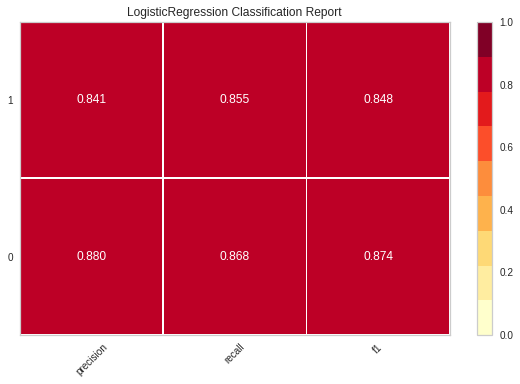

In [78]:
#Classification Report for Logistic Regression
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(lg)
visualizer.fit(X_train1, y_train1) # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

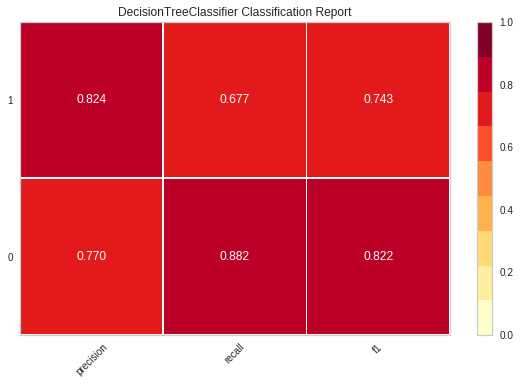

In [88]:
#Classification Report for Decision Tree
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(dtree)
visualizer.fit(X_train2, y_train2) # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

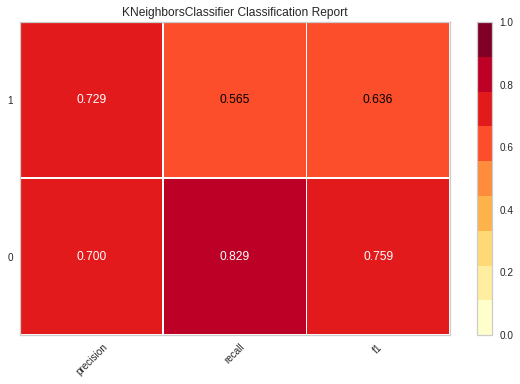

In [89]:
#Classification Report for Decision Tree
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(knn)
visualizer.fit(X_train3, y_train3) # Fit the training data to the visualizer
visualizer.score(X_test3, y_test3) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

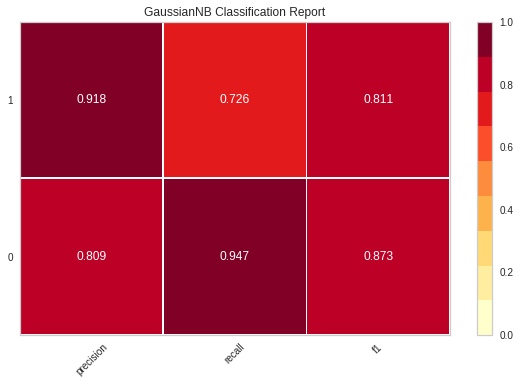

In [92]:
#Classification Report for  Naive-Bayes
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb)
visualizer.fit(X_train4, y_train4) # Fit the training data to the visualizer
visualizer.score(X_test4, y_test4) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

First import the ClassificationReport class provided by the yellowbrick.classifier module. Next, an object visualizer of the type ClassificationReport is created. Here the first argument is the all object of each modeles such as logistic regression,decision tree etc,that were created while implementing the all algorithm in the model bilding and evalution section. The second argument contains the labels ‘1’ and ‘0’ from the ‘Opportunity Result’ column from the df dataframe.
 Next, we use the fit() method to train the each model object. This is followed by the score() method which uses the each model object to carry out predictions according to the each algorithm and then calculate the accuracy score of the predictions made by this algorithm. Finally we use the poof() method to draw a plot of the different scores for the each algorithm.

In [125]:
import numpy as np
print("Total 0 and 1 of dependent variable: ")
print(y.value_counts())
print("Prediction value of Logistc Regression: ",np.unique(y_pred1))
print("Prediction value of Decision Tree: ",np.unique(y_pred2))
print("Prediction value of K-Nearest Neighbors: ",np.unique(y_pred3))
print("Prediction value of Naive Bayes: ",np.unique(y_pred4))

Total 0 and 1 of dependent variable: 
0    383
1    307
Name: Approved, dtype: int64
Prediction value of Logistc Regression:  [0 1]
Prediction value of Decision Tree:  [0 1]
Prediction value of K-Nearest Neighbors:  [0 1]
Prediction value of Naive Bayes:  [0 1]


In the above argument we check that class imbalance problem. It is the problem in machine learning where the total number of a class of data (positive) is far less than the total number of another class of data (negative). 
The output of these arugument says that i have no class embalance problem.

# 12 Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

In [162]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier()
model4=GaussianNB()
print('5-fold cross validation:\n')
labels = ['Logistic Regression', 'Decision Tree','K-Nearest Neighbors','Naive Bayes']
for model, label in zip([model1,model2,model3,model4], labels):
    scores = model_selection.cross_val_score(model, x, y,cv=5,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.84 (+/- 0.17) [Logistic Regression]
Accuracy: 0.79 (+/- 0.11) [Decision Tree]
Accuracy: 0.69 (+/- 0.06) [K-Nearest Neighbors]
Accuracy: 0.83 (+/- 0.13) [Naive Bayes]


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=5, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('Logistic Regression', model1))
model2 = DecisionTreeClassifier()
estimators.append(('Decision Tree', model2))
model3 = KNeighborsClassifier()
estimators.append(('K-Nearest Neighbors', model3))
model4=GaussianNB()
estimators.append(('Naive Bayes', model4)) 
# create the ensemble model
ensemble=VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
print("Ensamble: ",results.mean())

Ensamble:  0.826086956521739


# 13 Summary

In this project, we are tried to find out the factors that are most important for getting an 
approval for the credit card through the power of Data Analysis and Machine Learning. 
Though we have achieved 86%,83%,80%,71% of accuracy from 4 differnt models such as Logistic Regression, Decision Tree,K-Nearest Neighbors,Naive Bayes. We also tried to improve accuracy by Voting Ensemble technique but we get 83% accuracy.